In [ ]:
# How to install Jupiter
Jupiter is on PyPI, so you can use pip to install it:
```
# bash
$ pip install jupiter-negotiation
```
Jupiter is only developed in Python3.
If you want to use Jupiter, please see this notebook.

# 1. import jupiter

In [1]:
from jupiter.simulator.jupiter import Jupiter
from jupiter.simulator import negotiationRule

# 2. open paths about domain file and agents file

In [2]:
import sys
import os
import site
import importlib
sys.path.append(os.path.join(site.getsitepackages()[-1], "jupiter-negotiation/agents"))
path = os.path.join(site.getsitepackages()[-1], "jupiter-negotiation/")
print(path)
domain_path = os.path.join(path, "domain")

/Library/Python/3.6/site-packages/jupiter-negotiation/


# 3. execute test

------------------------------
start negotiation: 1
last turn: 0.11666666666666667
agreement bid: [0, 0]
parato distance: 0.2831292
LinearAgent : 0.7644222742526002
ConsederAgent : 0.5096148495017334


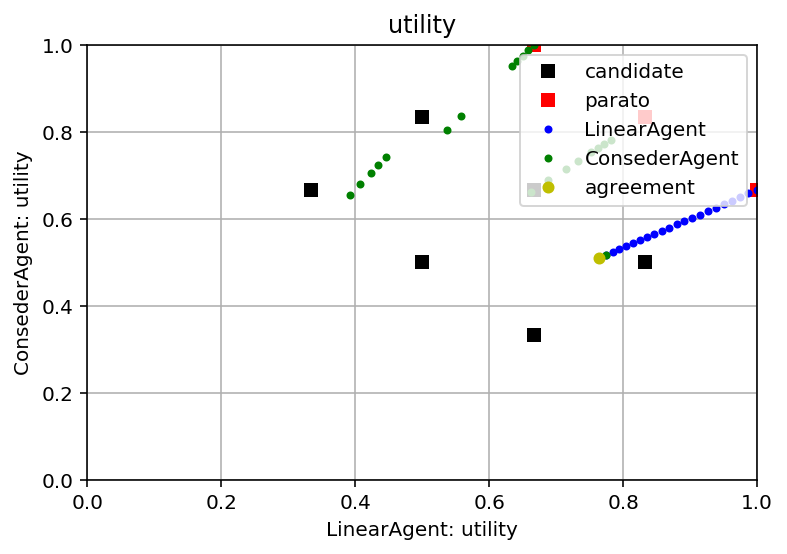

0

In [3]:
from jupiter.simulator import jupiter
%config InlineBackend.figure_format = 'retina'
jupiter.test(is_notebook=True)

# 4. Negotiation with two players (display the process of a negotiation)

------------------------------
start negotiation: 1


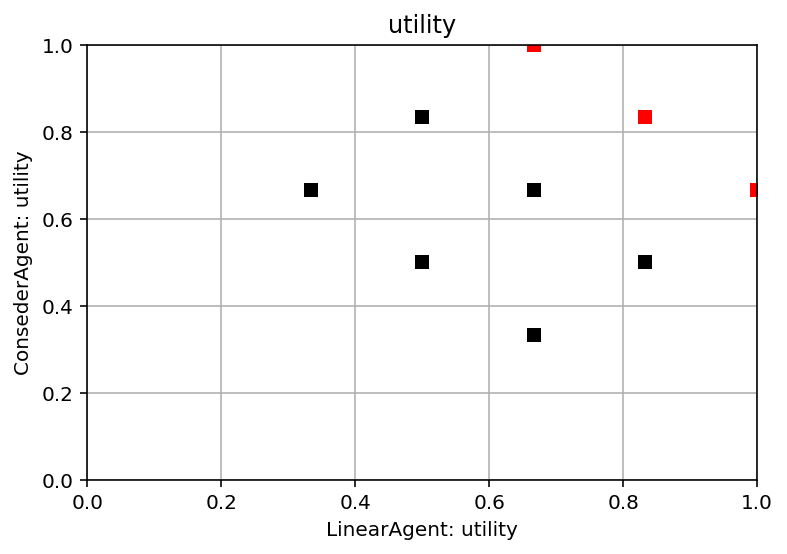

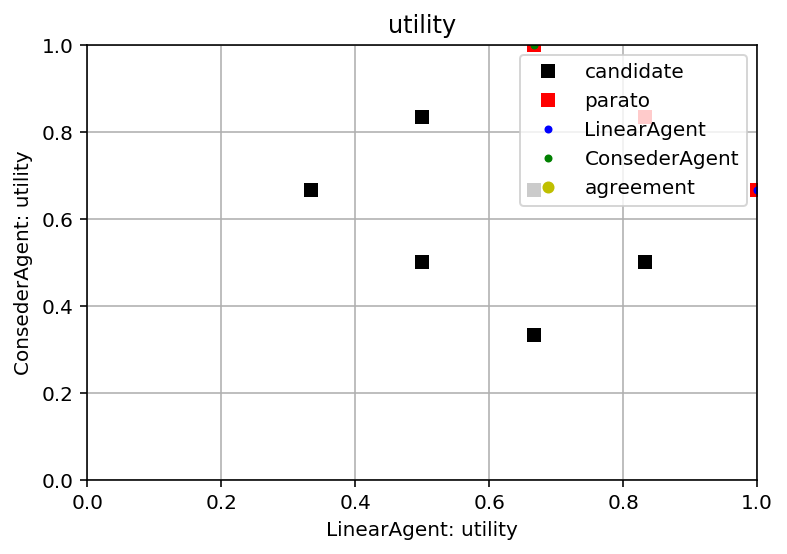

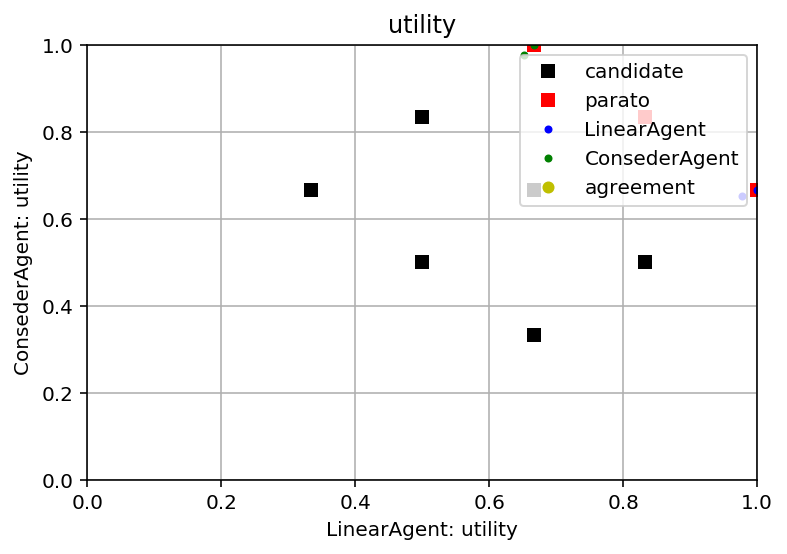

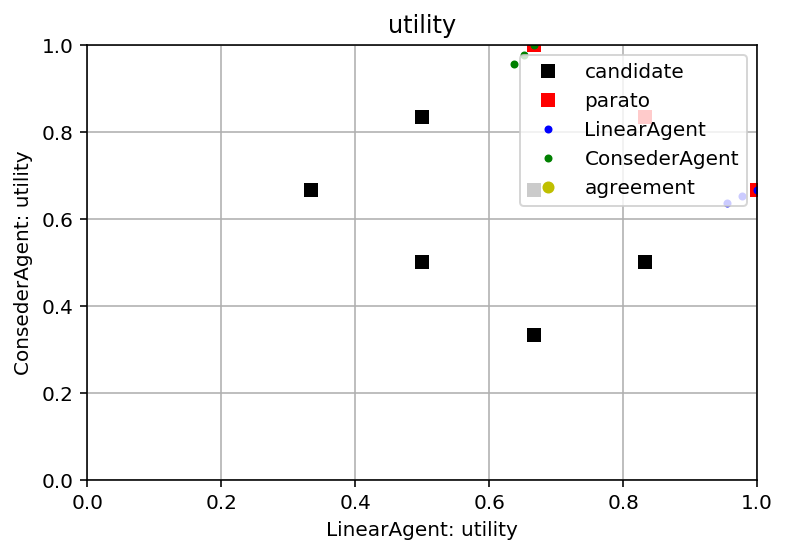

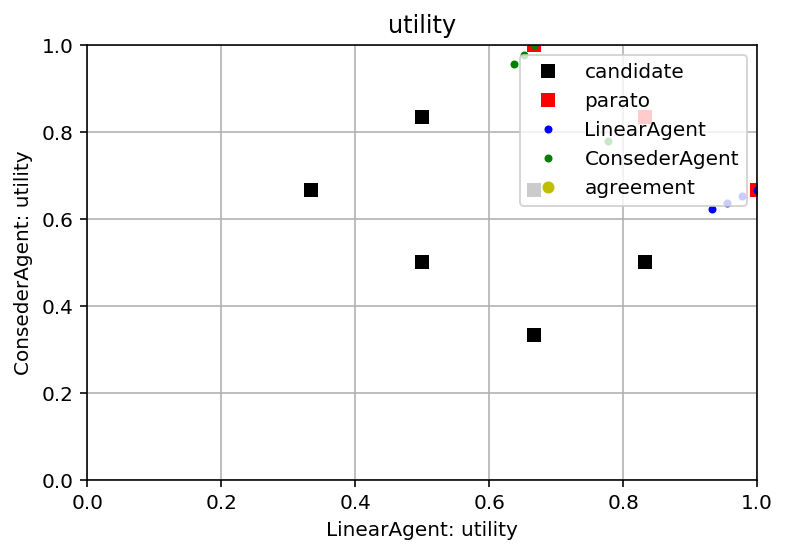

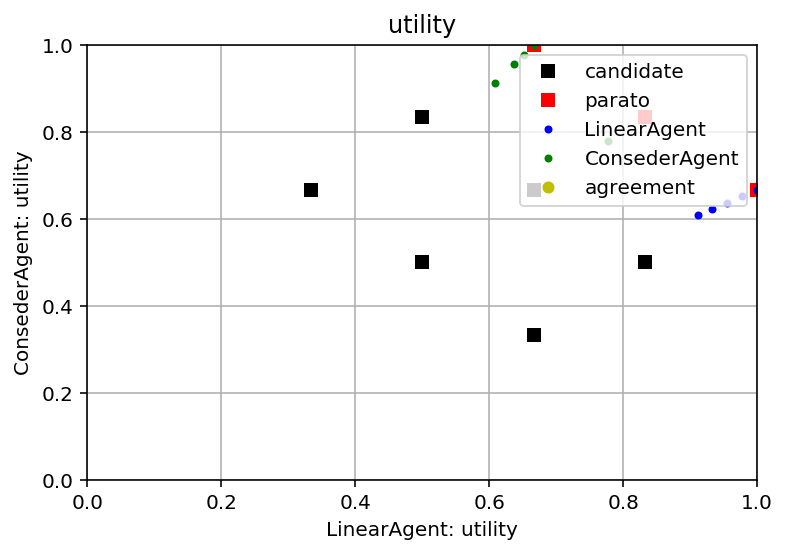

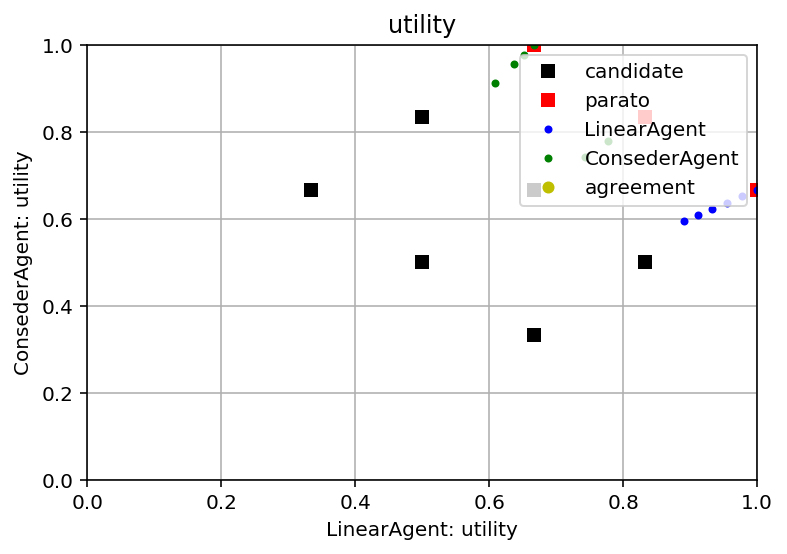

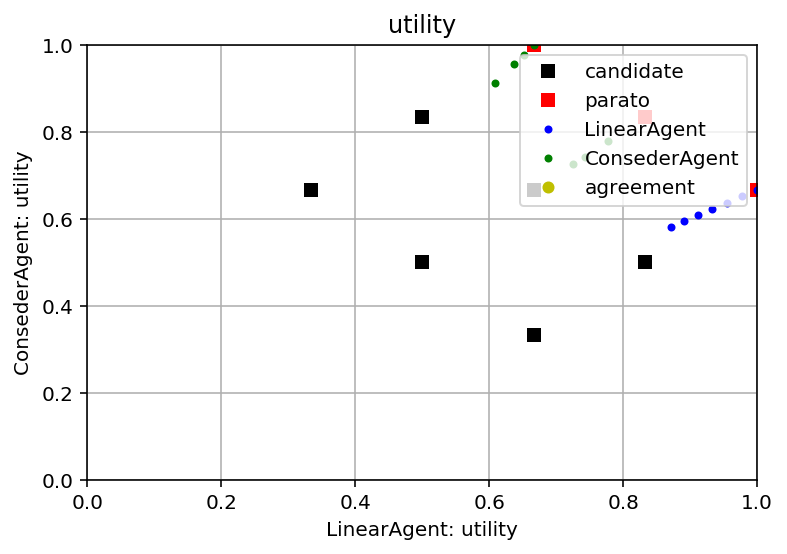

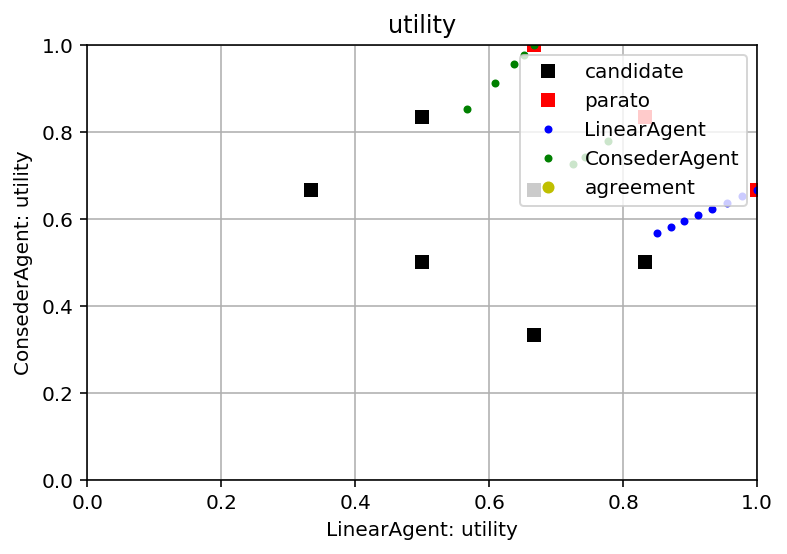

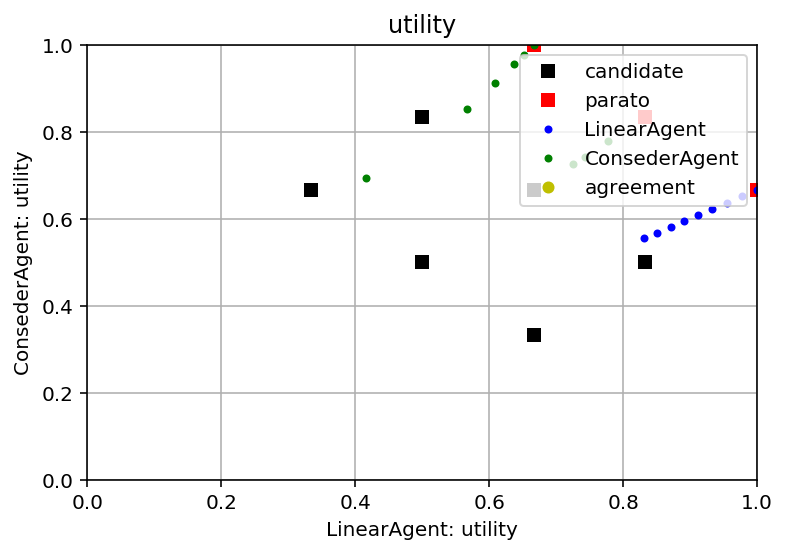

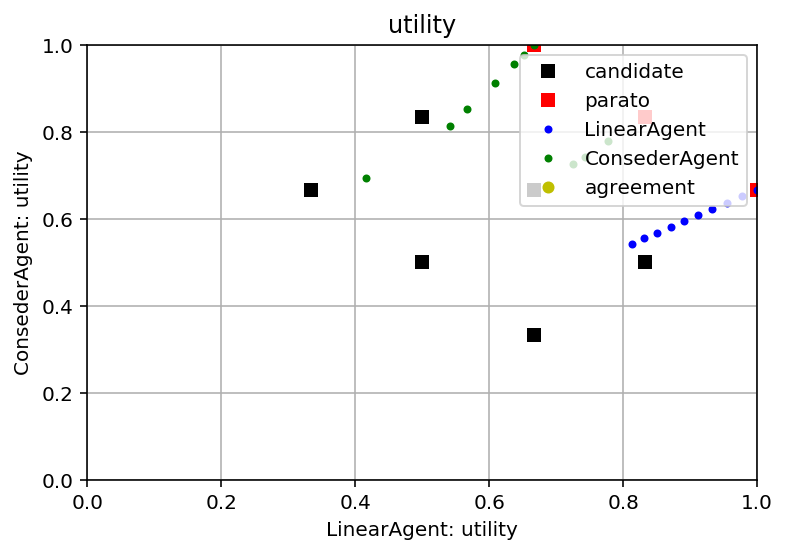

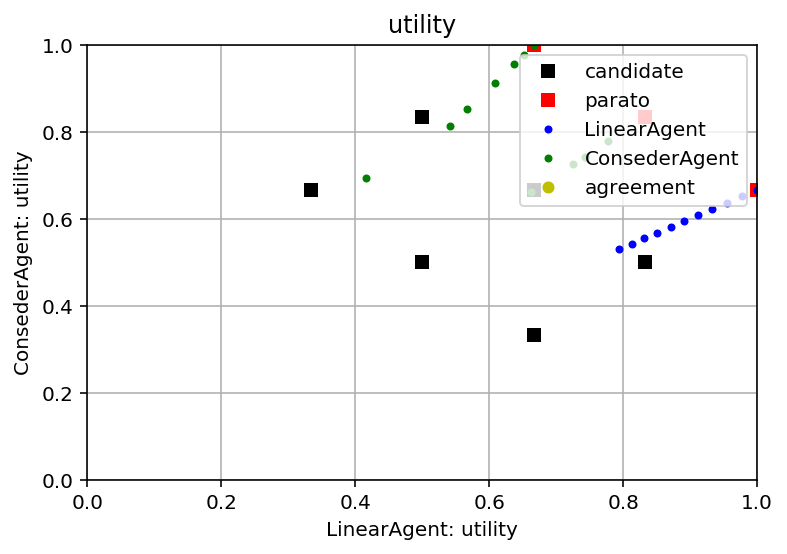

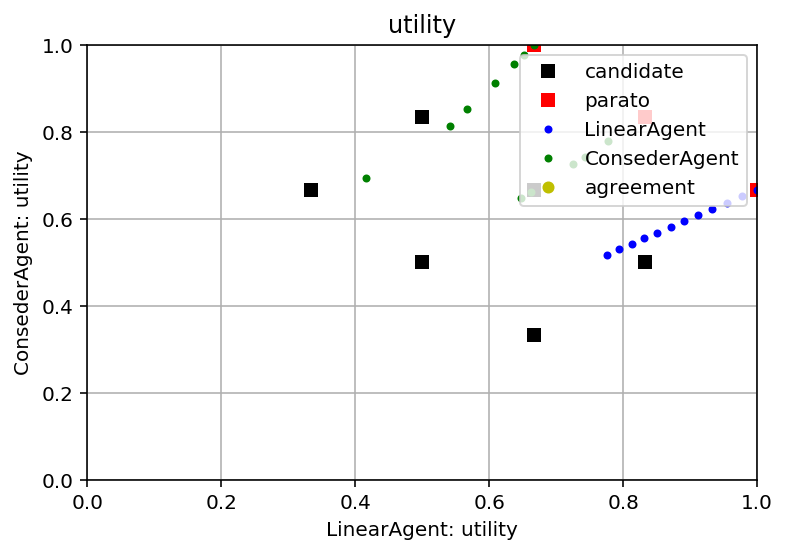

last turn: 0.12
agreement bid: [0, 0]
parato distance: 0.29015362
LinearAgent : 0.7585775750291838
ConsederAgent : 0.5057183833527892


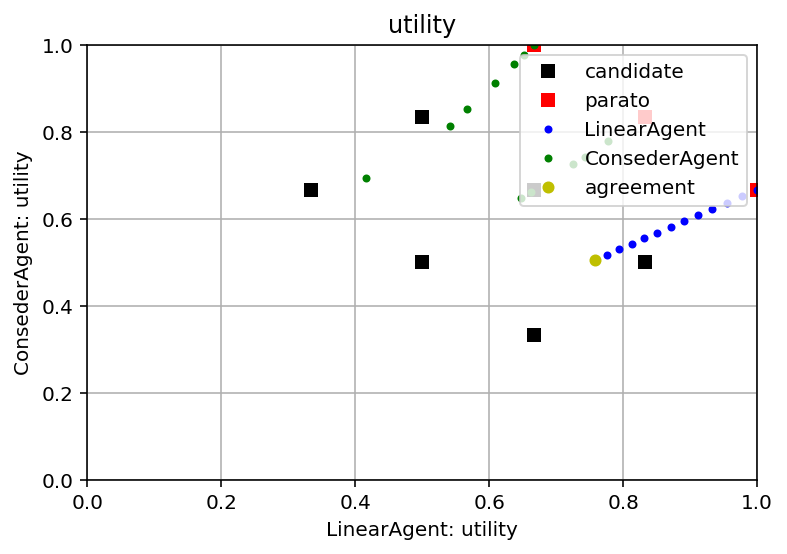

In [4]:
jupiter = Jupiter(negotiationRule.TypeOfNegotiation.Turn, 100, path + 'domain/Atlas3/triangularFight.xml',
     path +  'domain/Atlas3/triangularFight_util1.xml',  
     path +  'domain/Atlas3/triangularFight_util2.xml')  
import linearAgent
jupiter.set_agent(linearAgent, 'LinearAgent')
import concederAgent
jupiter.set_agent(concederAgent, 'ConcederAgent')

jupiter.set_notebook_flag()
%config InlineBackend.figure_format = 'retina'
jupiter.do_negotiation(is_printing=True, print_times=1)
jupiter.display.plot_initialize()
jupiter.display.plot2_notebook(jupiter.get_action_list_list()[-1],
                               jupiter.get_get_agreement_list()[-1])


# 5. A example of reinforce learning
ImprovementAgent uses deep q-learning network.
But it doesn't work well.

In [5]:
jupiter = Jupiter(negotiationRule.TypeOfNegotiation.Turn, 30, path + 'domain/Atlas3/triangularFight.xml',
     path +  'domain/Atlas3/triangularFight_util1.xml',  
     path +  'domain/Atlas3/triangularFight_util2.xml',
     path +  'domain/Atlas3/triangularFight_util3.xml')
import linearAgent
jupiter.set_agent(linearAgent, 'LinearAgent')
import concederAgent
jupiter.set_agent(concederAgent, 'ConcederAgent')
import improvementAgent
jupiter.set_agent(improvementAgent, 'ImprovementAgent')

# repeat a negotiation 100 times.
for i in range(0, 100):
    jupiter.do_negotiation(is_printing=False)


/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


[1, 3, 6, 8, 9]
------------------------------
start negotiation: 1
last turn: 0.16666666666666666
agreement bid: [0, 0]
parato distance: 0.30083647
LinearAgent : 0.6812920690579614
ConsederAgent : 0.45419471270530754
ImprovementAgent : 0.45419471270530754
------------------------------
start negotiation: 2
last turn: 0.13333333333333333
agreement bid: [0, 0]
parato distance: 0.25860715
LinearAgent : 0.7356422544596414
ConsederAgent : 0.4904281696397609
ImprovementAgent : 0.4904281696397609
------------------------------
start negotiation: 3
last turn: 0.16666666666666666
agreement bid: [0, 0]
parato distance: 0.30083647
LinearAgent : 0.6812920690579614
ConsederAgent : 0.45419471270530754
ImprovementAgent : 0.45419471270530754
------------------------------
start negotiation: 4
last turn: 0.2
agreement bid: [0, 0]
parato distance: 0.34976444
LinearAgent : 0.6309573444801932
ConsederAgent : 0.42063822965346215
ImprovementAgent : 0.42063822965346215
------------------------------
start n

# 6.1 Get the results of negotiation

In [6]:
utility_list = jupiter.get_end_utility_list()
# linear = []
improve = []
parato = []
for i in utility_list:
    print(i)
#     linear.append(i["LinearAgent"])
    improve.append(i["ImprovementAgent"])
    parato.append(i["parato_distance"])

{'LinearAgent': 0.6812920690579614, 'ConsederAgent': 0.45419471270530754, 'ImprovementAgent': 0.45419471270530754, 'agreement_bid': [0, 0], 'parato_distance': 0.30083647}
{'LinearAgent': 0.7356422544596414, 'ConsederAgent': 0.4904281696397609, 'ImprovementAgent': 0.4904281696397609, 'agreement_bid': [0, 0], 'parato_distance': 0.25860715}
{'LinearAgent': 0.6812920690579614, 'ConsederAgent': 0.45419471270530754, 'ImprovementAgent': 0.45419471270530754, 'agreement_bid': [0, 0], 'parato_distance': 0.30083647}
{'LinearAgent': 0.6309573444801932, 'ConsederAgent': 0.42063822965346215, 'ImprovementAgent': 0.42063822965346215, 'agreement_bid': [0, 0], 'parato_distance': 0.34976444}
{'LinearAgent': 0.45097460545538637, 'ConsederAgent': 0.27058476327323183, 'ImprovementAgent': 0.45097460545538637, 'agreement_bid': [1, 0], 'parato_distance': 0.44859004}
{'LinearAgent': 0.45097460545538637, 'ConsederAgent': 0.27058476327323183, 'ImprovementAgent': 0.45097460545538637, 'agreement_bid': [1, 0], 'para

# 6.2 Plot the results.

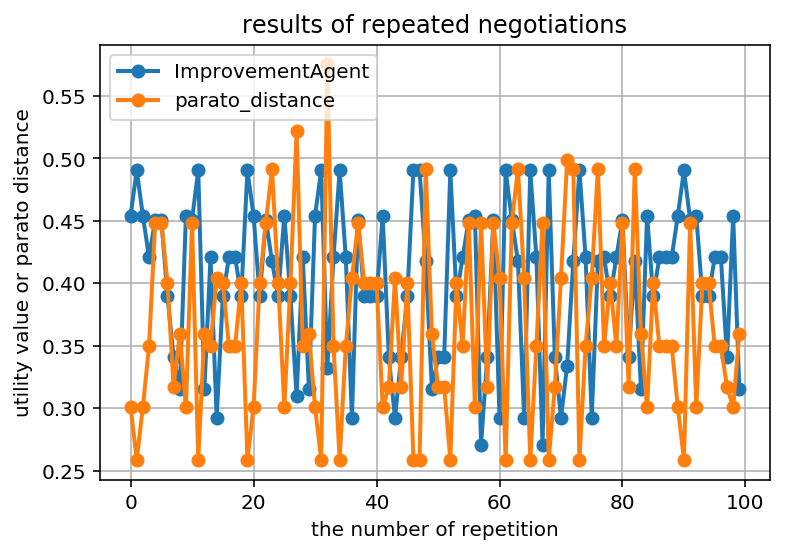

In [7]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

left = np.array(range(0, len(utility_list)))
p2 = plt.plot(left, improve, marker='o', linewidth=2)
p3 = plt.plot(left, parato, marker='o', linewidth=2)
plt.title("results of repeated negotiations")
plt.xlabel("the number of repetition")
plt.ylabel("utility value or parato distance")
plt.grid(True)
plt.legend(( p2[0], p3[0]), ( "ImprovementAgent", "parato_distance"), loc=2)

In [8]:
from plotly.offline import iplot, init_notebook_mode
import plotly.plotly as py
from plotly.graph_objs import Scatter, Data


init_notebook_mode(connected=True) 

trace0 = Scatter(
    x=left,
    y=parato,
    name="parato_distance"
)

trace1 = Scatter(
    x=left,
    y=improve,
    name="ImproveAgent"
)

data = Data([trace0, trace1])
# data = Data([trace0])
unique_url = iplot(data, filename = 'basic-line')